In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

<h2>A. Objective</h2>
<li>To analyze data for indentifying key trends in the relationship between trader performance and market sentiment.</li>
<li>To build an SARIMAX model that predicts the Sentiment value for the future dates.</li>


<h2>B. Tasks Performed</h2>

<h3>I. Dataset Overview</h3>

1. Reading the datasets

In [2]:
historical_data = pd.read_csv("https://raw.githubusercontent.com/Vishal-Varma/ds_Vishal_Varma/refs/heads/main/csv_files/historical_data.csv")
market_sentiment_data = pd.read_csv("https://raw.githubusercontent.com/Vishal-Varma/ds_Vishal_Varma/refs/heads/main/csv_files/fear_greed_index.csv")

2. General Info about datasets

In [3]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

<li>Historical Data contains about 2.11 lakh records.</li>
<li>The information shows that it doesn't contain null values.</li>

In [4]:
market_sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


<li>Market Sentiment Data contains about 2.6k records.</li>
<li>The information shows that it doesn't contain null values.</li>

3. Statistical Description of the dataset

In [ ]:
historical_data.describe().round(2)

Execution Price  Size Tokens    Size USD  Start Position  Closed PnL  \
count        211224.00    211224.00   211224.00       211224.00   211224.00   
mean          11414.72      4623.36     5639.45       -29946.25       48.75   
std           29447.65    104272.89    36575.14       673807.42      919.16   
min               0.00         0.00        0.00    -14334629.00  -117990.10   
25%               4.85         2.94      193.79         -376.23        0.00   
50%              18.28        32.00      597.05           84.73        0.00   
75%             101.58       187.90     2058.96         9337.28        5.79   
max          109004.00  15822438.00  3921430.72     30509482.00   135329.09   

           Order ID        Fee      Trade ID     Timestamp  
count  2.112240e+05  211224.00  2.112240e+05  2.112240e+05  
mean   6.965388e+10       1.16  5.628549e+14  1.737744e+12  
std    1.835753e+10       6.76  3.257565e+14  8.689920e+09  
min    1.732711e+08      -1.18  0.000000e+00  1.680000e+12  
25%    5.983853e+10       0.02  2.810000e+14  1.740000e+12  
50%    7.442939e+10       0.09  5.620000e+14  1.740000e+12  
75%    8.335543e+10       0.39  8.460000e+14  1.740000e+12  
max    9.014923e+10     837.47  1.130000e+15  1.750000e+12

<li>Since the Mean of the Numeric Columns is much larger than Median(50th Percentile), the dataset might be Right-Skewed.</li>
<li>The large difference between the Mean and Standard Deviation and that of 75 Percentile and Max values suggests presence of Outliers.</li>

In [ ]:
market_sentiment_data.describe().round(2)

timestamp    value
count  2.644000e+03  2644.00
mean   1.631899e+09    46.98
std    6.597967e+07    21.83
min    1.517463e+09     5.00
25%    1.574811e+09    28.00
50%    1.631900e+09    46.00
75%    1.688989e+09    66.00
max    1.746164e+09    95.00

<li>The <i>"value"</i> column appears to be Normally distributed, as its Mean ≈ Median(50th Percentile).</li>
<li>The <i>min</i> and <i>max</i> are not extreme as compared to the Quartiles(25th, 50th and 75th Percentile).</li>

In [ ]:
historical_data.describe(include = ["object"]).T

count  unique  \
Account           211224      32   
Coin              211224     246   
Side              211224       2   
Timestamp IST     211224   27977   
Direction         211224      12   
Transaction Hash  211224  101184   

                                                                top    freq  
Account                  0xbee1707d6b44d4d52bfe19e41f8a828645437aab   40184  
Coin                                                           HYPE   68005  
Side                                                           SELL  108528  
Timestamp IST                                      14-02-2025 00:31     441  
Direction                                                 Open Long   49895  
Transaction Hash  0x00000000000000000000000000000000000000000000...    9032

<li>There are 246 unique coin names, with most frequent one is <i>"Hype"</i></li>
<li>The most frequent <i>Direction</i> is "Open Long". Most people opt to buy an asset with the expectation that its price will rise.</li>

In [ ]:
market_sentiment_data.describe(include = ["object"]).T

count unique         top freq
classification  2644      5        Fear  781
date            2644   2644  2025-05-02    1

<li>There are 5 unique <i>Classification</i> Types with <i>"Fear"</i> being most frequent.</li>

In [ ]:
historical_data.head(5)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

In [ ]:
market_sentiment_data.head(5)

timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

<h3>II. Exploratory Data Analysis</h3>

In [ ]:
COLOR_SCHEME = px.colors.sequential.Teal_r

Merging the Datasets : <br>
<li>Joining two datasets on the date column to compare and visualize relationships. </li>
<li>Since the Historical Data doesn't contain the <i>date</i> column explicitly, I am using <i><code>pd.to_datetime()</code></i> function to extract dates from the column <i>Timestamp IST</i>.

In [ ]:
historical_data["Date"] = pd.to_datetime(historical_data["Timestamp IST"], format = "mixed").dt.floor("d") # Using format = "mixed", since timestamp may have inconsistent date formats and removing timestamp to convert it to datetime.
historical_data.head(5)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       Date  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-02-12  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-02-12  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-02-12  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-02-12  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-02-12

In [ ]:
market_sentiment_data.columns = ["Timestamp", "Value", "Classification", "Date"] # Capitalizing Column names for Joining
market_sentiment_data["Date"] = pd.to_datetime(market_sentiment_data["Date"])
market_sentiment_data.head(5)

Timestamp  Value Classification       Date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02
2  1517635800     40           Fear 2018-02-03
3  1517722200     24   Extreme Fear 2018-02-04
4  1517808600     11   Extreme Fear 2018-02-05

In [ ]:
merged_data = pd.merge(historical_data, market_sentiment_data.drop("Timestamp", axis = 1), on = "Date", how = "left")
merged_data.info() # May contain some null values as I used "Left" outer join to keep all records from our Historical Data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [ ]:
merged_data_clean = merged_data.dropna(subset = ["Value", "Classification"]) # Dropping nulls to prevent misleading visuals.

Sentiment Value vs Closed PnL by Sentiment Classification

In [ ]:
fig = px.scatter(
    data_frame = merged_data_clean,
    x = "Value",
    y = "Closed PnL",
    color = "Classification",
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "Sentiment Value vs Closed PnL by Sentiment Classification",
    xaxis_title = "Sentiment Value",
    yaxis_title = "Closed PnL"
)
fig.update_traces(
    hovertemplate = "<b>Sentiment Value : </b>%{x:.2f}<br>" + "<b>Closed PnL : </b>%{y:.2f}"
)
fig.show()

Sentiment Value vs Closed PnL by Trade Type

In [ ]:
fig = px.scatter(
    data_frame = merged_data_clean,
    x = "Value",
    y = "Closed PnL",
    color = "Side",
    color_discrete_sequence = COLOR_SCHEME[::2]
)
fig.update_layout(
    title = "Sentiment Value vs Closed PnL by Trade Type",
    xaxis_title = "Sentiment Value",
    yaxis_title = "Closed PnL"
)
fig.update_traces(
    hovertemplate = "<b>Sentiment Value : </b>%{x:.2f}<br>" + "<b>Closed PnL : </b>%{y:.2f}"
)
fig.show()

Top 10 most Profitable Coins

In [ ]:
most_profitable_coins = merged_data_clean.groupby("Coin")["Closed PnL"].mean().round(2).reset_index().sort_values("Closed PnL", ascending = False).head(10)

fig = px.bar(
    data_frame = most_profitable_coins,
    x = "Coin",
    y = "Closed PnL",
    color = "Closed PnL",
    color_continuous_scale = COLOR_SCHEME,
    text_auto = True
)
fig.update_layout(
    title = "Top 10 most Profitable Coins",
    yaxis = dict(
        title = "Average Closed PnL",
        range = [115, 385]
    ),
    xaxis_title = "Coin",
    coloraxis_showscale = False
)
fig.update_traces(
    hovertemplate = "<b>Coin : </b>%{x}<br>" +  "<b>Average Closed PnL : </b>%{y:.2f}"
)
fig.show()

Top 10 least Profitable Coins

In [ ]:
least_profitable_coins = merged_data_clean.groupby("Coin")["Closed PnL"].mean().round(2).reset_index().sort_values("Closed PnL", ascending = False).tail(10)

fig = px.bar(
    data_frame = least_profitable_coins.sort_values("Closed PnL"),
    x = "Coin",
    y = "Closed PnL",
    color = "Closed PnL",
    color_continuous_scale = COLOR_SCHEME,
    text_auto = True
)
fig.update_layout(
    title = "Top 10 least Profitable Coins",
    yaxis = dict(
        title = "Average Closed PnL",
    ),
    xaxis_title = "Coin",
    coloraxis_showscale = False
)
fig.update_traces(
    hovertemplate = "<b>Coin : </b>%{x}<br>" +  "<b>Average Closed PnL : </b>%{y:.2f}"
)
fig.show()

Trade Size vs Profitability by Sentiment Classification

In [ ]:
fig = px.scatter(
    data_frame = merged_data_clean,
    x = "Size USD",
    y = "Closed PnL",
    color = "Classification",
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "Trade Size vs Profitability by Sentiment Classification",
    yaxis_title = "Closed PnL",
    xaxis_title = "Trade Size ($USD)",
    coloraxis_showscale = False
)
fig.update_traces(
    hovertemplate = "<b>Trade Size : </b>%{x} USD<br>" +  "<b>Closed PnL : </b>%{y:.2f}"
)
fig.show()

Daily Average Profitability by Sentiment Classification

In [ ]:
daily_average_profitability_by_classification = merged_data_clean.groupby(["Date", "Classification"])["Closed PnL"].mean().round(2).reset_index()

fig = px.scatter(
    data_frame = daily_average_profitability_by_classification.sort_values("Date"),
    x = "Date",
    y = "Closed PnL",
    color = "Classification",
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "Daily Average Profitability by Sentiment Classification",
)
fig.update_traces(
    hovertemplate = "<b>Clodes PnL : </b>%{y}<br>" + "<b>Date : </b>%{x}<br>"
)
fig.show()

Fees Paid vs Profitability by Trade Crossing

In [ ]:
fig = px.scatter(
    data_frame = merged_data_clean,
    x = "Fee",
    y = "Closed PnL",
    color = "Crossed",
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "Fees Paid vs Profitability by Trade Crossing",
    yaxis_title = "Closed PnL",
    xaxis_title = "Fees Paid"
)
fig.update_traces(
    hovertemplate = "<b>Fees Paid : </b>%{x}<br>" +  "<b>Closed PnL : </b>%{y.:2f}"
)
fig.show()

Key Insights <br>
<li><b>Profitability</b> is <i>*not* depending</i> on <b>Fees paid</b> and <b>Trade Sizes ($USD)</b>.</li>
<li><b>Greed</b> led to <i>highest <b>Loss</b></i> whereas <b>Extreme Fear</b> led to <i>highest <b>Profit</b></i>.</li>
<li>Certain coins like <b>AVAX</b>, <b>@109</b>, <b>ENA</b>, etc performed better than others.</li>
<li><b>Buying</b> resulted in comparatively <i>*more*</i> loss than <b>Selling</b>.</li>
<li>In short, it's <b>not</b> about <b><i>timing the market</i></b>, it's about <b><i>time in the market</i></b>.</li>

<h3>III. Data Preprocessing<h3>

In [ ]:
model_data = market_sentiment_data.copy()

1. Setting Date column as index

In [ ]:
model_data = model_data[["Date", "Value"]]

In [ ]:
model_data = model_data.set_index("Date").sort_index()

2. ADF Test to check Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test = adfuller(model_data["Value"])
print(f"ADF Statistic : {test[0]:.2f}\np-value : {test[1]:.7f}")

ADF Statistic : -5.63
p-value : 0.0000011


<li>Since p < 0.05, Value is Stationary.</li>
<li>Hence, no Differencing is required.</li>

3. ACF and PACF Plots

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
value_acf = acf(model_data["Value"], nlags = 50)
value_pacf = pacf(model_data["Value"], nlags = 50)

In [ ]:
fig = px.bar(
    x = np.arange(len(value_acf)),
    y = value_acf,
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "ACF Plot for Value",
    xaxis_title = "Lags",
    yaxis_title = "ACF Values"
)
fig.show()

In [ ]:
fig = px.bar(
    x = np.arange(len(value_pacf)),
    y = value_pacf,
    color_discrete_sequence = COLOR_SCHEME
)
fig.update_layout(
    title = "PACF Plot for Value",
    xaxis_title = "Lags",
    yaxis_title = "PACF Values"
)
fig.show()

<li><b>PACF</b> : After 2nd Lag, starts rapid decrease. p = 2</li>
<li><b>Differencing</b> : No Differencing required as our Value column is stationary. d = 0</li>
<li><b>ACF</b> : No clear decrease after specific lag. Hence I'm taking q = 1</li>

4. Check for Seasonality

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

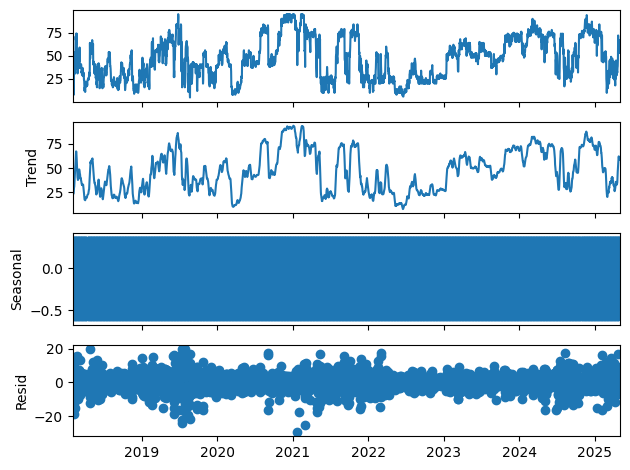

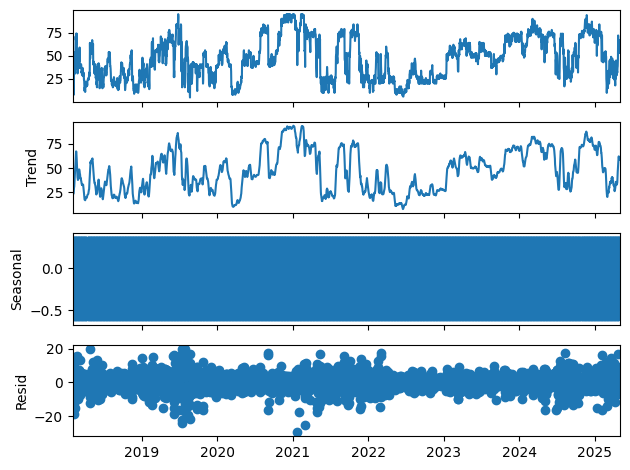

In [ ]:
result = seasonal_decompose(model_data, period = 7)
result.plot()

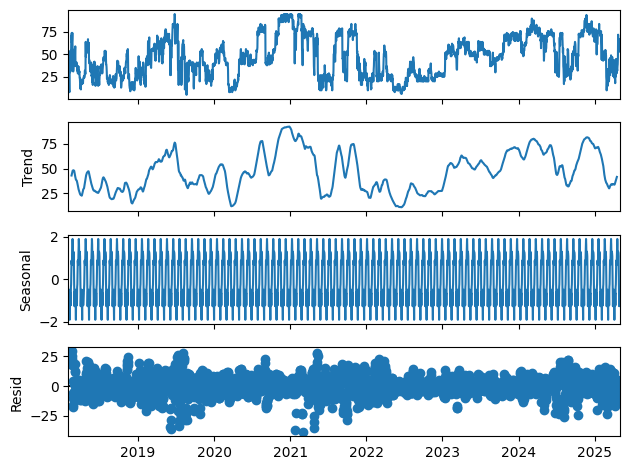

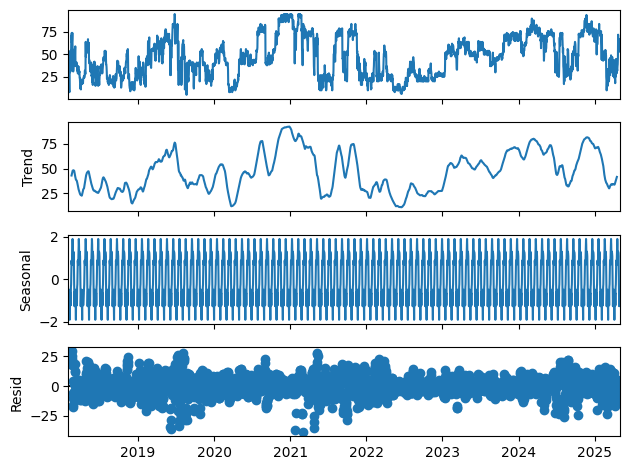

In [ ]:
result = seasonal_decompose(model_data, period = 30)
result.plot()

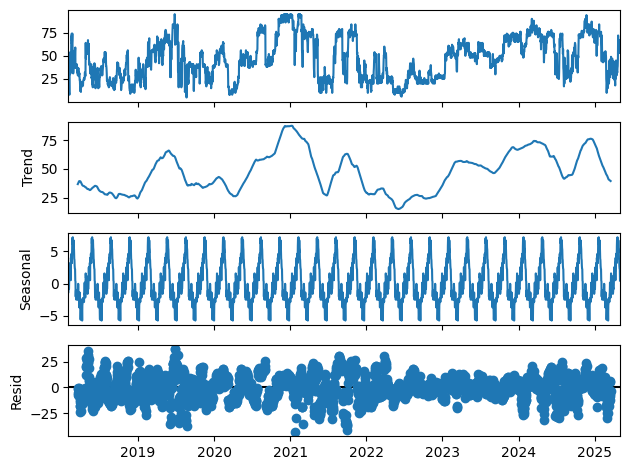

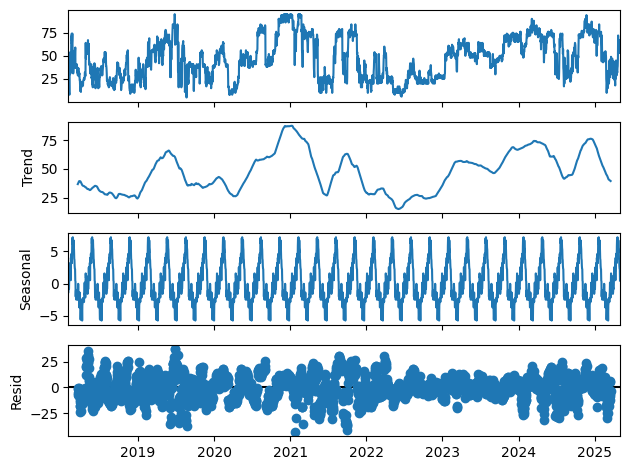

In [ ]:
result = seasonal_decompose(model_data, period = 90)
result.plot()

<li>The <i><b>Seasonal</b></i> component for 30 days and 90 days shows repeating pattern. I will be trying them both.</li>

<h3>IV. Building SARIMAX Model</h3>

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(
    model_data,
    order = (2, 0, 1), # (p, d, q) = (2, 0, 1) ==> taken from ACF and PACF plots
    seasonal_order = (2, 0, 1, 30) # Trying earlier (p, d, q) values
)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
history = model.fit()

In [ ]:
history.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                 2644
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 30)   Log Likelihood               -8637.148
Date:                            Thu, 25 Sep 2025   AIC                          17288.297
Time:                                    11:41:39   BIC                          17329.457
Sample:                                         0   HQIC                         17303.198
                                           - 2644                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1156      0.061     18.334      0.000       0.996       1.235
ar.L2         -0.1188      0.061     -1.961      0.050      -0.238   -4.23e-05
ma.L1         -0.3649      0.058     -6.313      0.000      -0.478      -0.252
ar.S.L30       0.5392      0.284      1.899      0.058      -0.017       1.096
ar.S.L60      -0.0521      0.017     -2.991      0.003      -0.086      -0.018
ma.S.L30      -0.5221      0.283     -1.842      0.065      -1.078       0.033
sigma2        40.1988      0.583     68.905      0.000      39.055      41.342
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4449.92
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5. Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [ ]:
prediction = history.predict(-100)
actual = model_data["Value"].tail(100)

In [ ]:
print(f"R2 Score : {r2_score(actual.values, prediction.values):.2f}")
print(f"RMSE : {root_mean_squared_error(actual.values, prediction.values):.2f}")

R2 Score : 0.71
RMSE : 8.71


In [ ]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = actual.index,
        y = actual.values,
        mode = "lines",
        name = "Actual",
        marker = dict(
            color = COLOR_SCHEME[0]
        )
    )
)
fig.add_trace(
    go.Scatter(
        x = prediction.index,
        y = prediction.values,
        mode = "lines",
        name = "Predicted",
        marker = dict(
            color = COLOR_SCHEME[2]
        )
    )
)
fig.update_layout(
    title = "Date-wise Actual vs Predicted Sentiment Values",
    xaxis_title = "Date",
    yaxis_title = "Sentiment Value"
)
fig.update_traces(
    hovertemplate = "<b>Date : </b>%{x}<br>" + "<b>Value : </b>%{y:.2f}"
)
fig.show()